In [ ]:
### We all know how unpredictable Seattle Weather can be ! Here is some more analysis on that. Have a good Read.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/sakri18/Downloads/seattleWeather_1948-2017 (1).csv")
df.head(10)
## Target variable is binary with True/False 'Outcomes'


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [4]:
from sklearn.linear_model import LogisticRegression

In [24]:
df=df.dropna()
X=df.loc[:,['PRCP','TMAX','TMIN']]
X

,PRCP,TMAX,TMIN
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32
5,0.44,48,39
6,0.41,50,40
7,0.04,48,35
8,0.12,50,31
9,0.74,43,34


In [63]:
X1=df.loc[:,['PRCP','TMAX','TMIN']].shift(-1)


In [37]:
X1=df.loc[:,['PRCP','TMAX','TMIN']].shift(-1).iloc[:-1].values
X1

array([[  0.59,  45.  ,  36.  ],
       [  0.42,  45.  ,  35.  ],
       [  0.31,  45.  ,  34.  ],
       ..., 
       [  0.  ,  46.  ,  32.  ],
       [  0.  ,  48.  ,  34.  ],
       [  0.  ,  50.  ,  36.  ]])

In [47]:
Y1 = df.iloc[:-1, -1:].values.astype('int')
Y1

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [0]])

In [50]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X1,Y1)
y_hat = clf.predict(X1)

C:\Users\sakri18\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
###Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat)

0.69894703879124753

In [53]:
###Confusion Matrix;
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat)

array([[11220,  3427],
       [ 4264,  6636]])

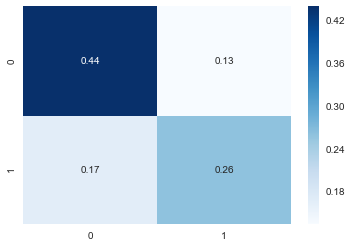

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_hat) / len(y), cmap='Blues', annot=True)
plt.show() ###Generating the Confusion Matrix through Seaborn Visualization from the Results we obtained from Logistic Regression !


In [59]:
from sklearn.metrics import hamming_loss

hamming_loss(y, y_hat)

0.30105296120875252

In [61]:
##Obtainiing the Precision and Recall Score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

print("Precision",precision_score(y, y_hat))
print("Recall",recall_score(y, y_hat))

Precision 0.659445493392
Recall 0.60880733945


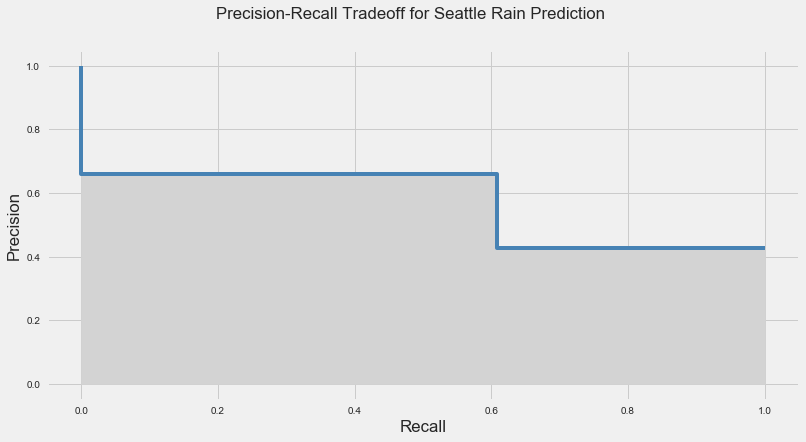

In [62]:
##sklearn includes a utility for visualizing the trade-off between these two values, the precision_recall_curve.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

precision, recall, _ = precision_recall_curve(y, y_hat)

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.step(recall, precision, color='steelblue',
         where='post')
ax.fill_between(recall, precision, step='post', color='lightgray')
plt.suptitle('Precision-Recall Tradeoff for Seattle Rain Prediction')
plt.xlabel('Recall')
plt.ylabel('Precision')

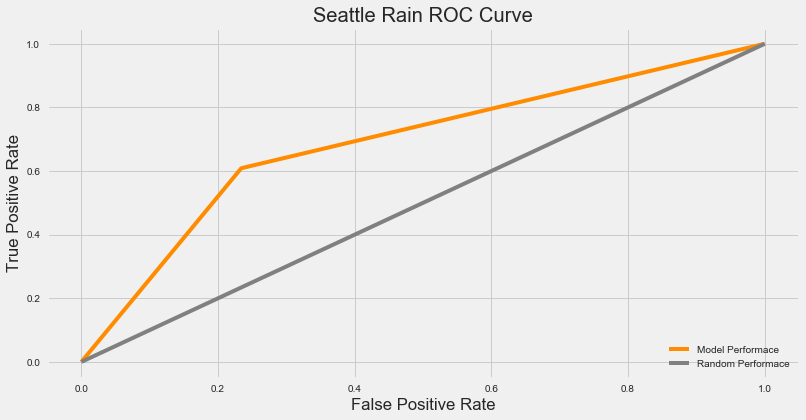

In [64]:
### Generating the 'ROC' Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_hat)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Seattle Rain ROC Curve')
plt.legend(loc="lower right")

In [65]:
###AUC Metric

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_hat)

0.68741725612471605